In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
df = pd.read_csv('../../Dataset/BID-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,25141.5
1,3/4/2019,25715.5
2,3/5/2019,26480.9
3,3/6/2019,26595.7
4,3/7/2019,26710.5
...,...,...
1308,5/27/2024,48900.0
1309,5/28/2024,49100.0
1310,5/29/2024,48600.0
1311,5/30/2024,47700.0


In [4]:
data

,Price
0,25141.5
1,25715.5
2,26480.9
3,26595.7
4,26710.5
...,...
1308,48900.0
1309,49100.0
1310,48600.0
1311,47700.0


In [5]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 7:3
train_size = int(0.7 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [6]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [7]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [9]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 11.645332965729514
Mean Absolute Error (MAE): 4496.27164390867
Root Mean Squared Error (RMSE): 5967.76843392094


In [10]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[39758.36683645]
 [39766.76515745]
 [39775.16347846]
 [39783.56179946]
 [39791.96012046]
 [39800.35844147]
 [39808.75676247]
 [39817.15508347]
 [39825.55340448]
 [39833.95172548]
 [39842.35004648]
 [39850.74836748]
 [39859.14668849]
 [39867.54500949]
 [39875.94333049]
 [39884.3416515 ]
 [39892.7399725 ]
 [39901.1382935 ]
 [39909.53661451]
 [39917.93493551]
 [39926.33325651]
 [39934.73157752]
 [39943.12989852]
 [39951.52821952]
 [39959.92654053]
 [39968.32486153]
 [39976.72318253]
 [39985.12150354]
 [39993.51982454]
 [40001.91814554]]
RangeIndex(start=1312, stop=1342, step=1)


In [11]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[39766.76515745]
 [39775.16347846]
 [39783.56179946]
 [39791.96012046]
 [39800.35844147]
 [39808.75676247]
 [39817.15508347]
 [39825.55340448]
 [39833.95172548]
 [39842.35004648]
 [39850.74836748]
 [39859.14668849]
 [39867.54500949]
 [39875.94333049]
 [39884.3416515 ]
 [39892.7399725 ]
 [39901.1382935 ]
 [39909.53661451]
 [39917.93493551]
 [39926.33325651]
 [39934.73157752]
 [39943.12989852]
 [39951.52821952]
 [39959.92654053]
 [39968.32486153]
 [39976.72318253]
 [39985.12150354]
 [39993.51982454]
 [40001.91814554]
 [40010.31646655]
 [40018.71478755]
 [40027.11310855]
 [40035.51142956]
 [40043.90975056]
 [40052.30807156]
 [40060.70639257]
 [40069.10471357]
 [40077.50303457]
 [40085.90135558]
 [40094.29967658]
 [40102.69799758]
 [40111.09631859]
 [40119.49463959]
 [40127.89296059]
 [40136.2912816 ]
 [40144.6896026 ]
 [40153.0879236 ]
 [40161.48624461]
 [40169.88456561]
 [40178.28288661]
 [40186.68120762]
 [40195.07952862]
 [40203.47784962]

In [12]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[39758.36683645]
 [39766.76515745]
 [39775.16347846]
 [39783.56179946]
 [39791.96012046]
 [39800.35844147]
 [39808.75676247]
 [39817.15508347]
 [39825.55340448]
 [39833.95172548]
 [39842.35004648]
 [39850.74836748]
 [39859.14668849]
 [39867.54500949]
 [39875.94333049]
 [39884.3416515 ]
 [39892.7399725 ]
 [39901.1382935 ]
 [39909.53661451]
 [39917.93493551]
 [39926.33325651]
 [39934.73157752]
 [39943.12989852]
 [39951.52821952]
 [39959.92654053]
 [39968.32486153]
 [39976.72318253]
 [39985.12150354]
 [39993.51982454]
 [40001.91814554]
 [40010.31646655]
 [40018.71478755]
 [40027.11310855]
 [40035.51142956]
 [40043.90975056]
 [40052.30807156]
 [40060.70639257]
 [40069.10471357]
 [40077.50303457]
 [40085.90135558]
 [40094.29967658]
 [40102.69799758]
 [40111.09631859]
 [40119.49463959]
 [40127.89296059]
 [40136.2912816 ]
 [40144.6896026 ]
 [40153.0879236 ]
 [40161.48624461]
 [40169.88456561]
 [40178.28288661]
 [40186.68120762]
 [40195.07952862]

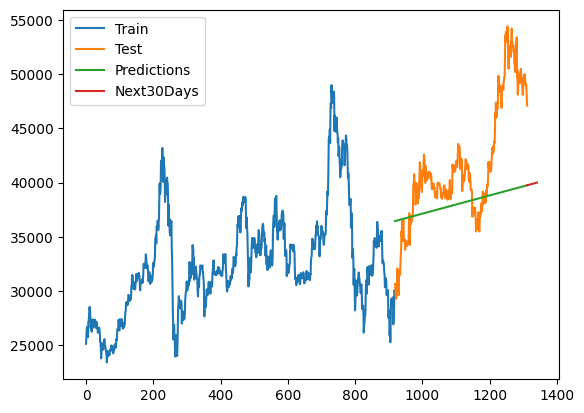

In [13]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

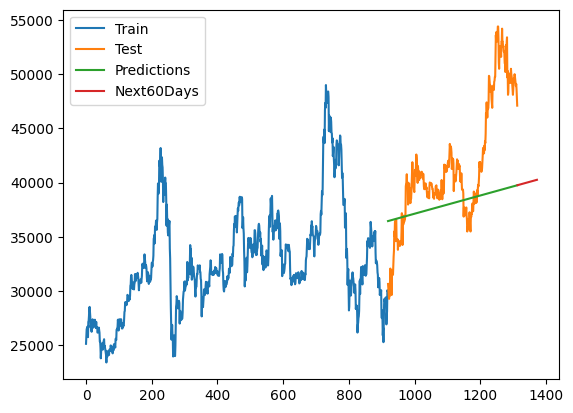

In [14]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

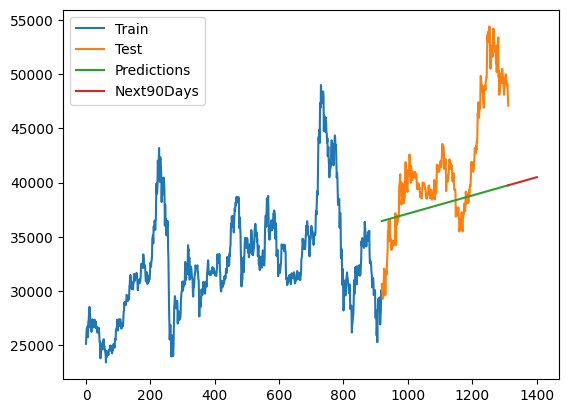

In [15]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()